In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

from astropy.modeling.models import NFW
import astropy.units as u
from astropy import cosmology
import sympy as sp
data = pd.read_csv("/Users/shreyanakum/Desktop/K Coefficient/Paper HI Column Density & Redshift of Observational Data MODIFIED - Sheet1.csv")

# PredictedM

In [2]:
def halo_mass(precision, logm):
    halo_mass_list = np.logspace(10, 15, precision)
    print ("Halo Masses: ", halo_mass_list)
    
    galaxy_mass_R = []
    for x in halo_mass_list:
        M1 = np.power(10, 11.884)
        beta = -1.057
        gamma = 0.556
        mMot = 2*0.02820
        MMo = x/M1
        galaxy_mass_R.append(x*mMot*(np.power((np.power(MMo, beta) + np.power(MMo, gamma)), -1)))
    
    predicted_M = []
    for x in logm:
        halo_mass_list = np.logspace(10, 15, precision)
        predicted_stellar_mass_list = np.log10(galaxy_mass_R)
        mask = predicted_stellar_mass_list >= x
        predicted_M.append(halo_mass_list[mask][0])
    return predicted_M

In [3]:
logm = data['log M_*']
predictedM = halo_mass(10000, logm)

Halo Masses:  [1.00000000e+10 1.00115207e+10 1.00230547e+10 ... 9.97699834e+14
 9.98849255e+14 1.00000000e+15]


# V_circ

Using NFW Profile:

In [4]:
redshift_d = data['z']
impact_parameter_d = data['R']
counter = 0;
for mass, redshift, impact_parameter in zip(predictedM, redshift_d, impact_parameter_d): 
    for concentration in range(6,11,1): 
        cosmo = cosmology.Planck15
        massfactor = ("critical", 200)
        
        n = NFW(mass=mass, concentration=concentration, redshift=redshift, cosmo=cosmo, massfactor=massfactor)
        
        radii = range(1,300,10) * u.kpc
        
        # NFW circular velocity distribution
        n_result = n.circular_velocity(radii)
        
        # Plot creation
        #X = plt.plot(radii, n_result, '-', label = concentration)
        #plt.xscale('linear')
        #v = plt.axvline(x = impact_parameter, color = 'red')
        counter = counter+1
        
    # Display plot
    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    #print("%e"%mass)
    #print((counter-5)/5)
    #leg = plt.legend(loc='upper right')
    #plt.xlabel("Radius (kpc)")
    #plt.ylabel("Circular Velocity (km/s)")
    #plt.title("NFW Circular Velocity Profile")
    #plt.show()

Text(0.5, 1.0, 'NFW Circular Velocity Profile')

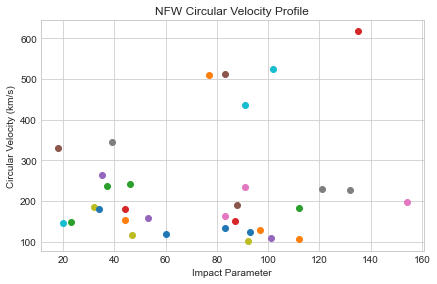

In [5]:
graph_vals = []
redshift_d = data['z']
impact_parameter_d = data['R']
velocity_vals = [134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548]
for mass, redshift, impact_parameter in zip(predictedM, redshift_d, impact_parameter_d):
    cosmo = cosmology.Planck15
    massfactor = ("critical", 200)
        
    n = NFW(mass=mass, concentration=10, redshift=redshift, cosmo=cosmo, massfactor=massfactor)

    radii = range(1,300,10) * u.kpc

    # NFW circular velocity distribution
    n_result = n.circular_velocity(impact_parameter)

    # Plot creation
    plt.scatter(impact_parameter, n_result)
    #print(impact_parameter, n_result)
    graph_vals.append(n_result)

# Display plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xlabel("Impact Parameter")
plt.ylabel("Circular Velocity (km/s)")
plt.title("NFW Circular Velocity Profile")

Using Tully-Fisher:

In [167]:
def tully_fisher_circular_velocity(log_stellar_mass, beta, alpha):
    a = (np.add(log_stellar_mass, -10.1))
    b = np.multiply(alpha, a)
    c = np.add(beta, b)
    return np.power(10, c)

In [168]:
lower_tully_fisher_vc = tully_fisher_circular_velocity(logm, 2.138, 0.268)
higher_tully_fisher_vc = tully_fisher_circular_velocity(logm, 2.146, 0.288)
a = tully_fisher_circular_velocity(logm, 2.142, 0.278)

average_tully_fisher_vc = []
for item in range(0,len(R)):
    average_tully_fisher_vc.append((lower_tully_fisher_vc[item]+higher_tully_fisher_vc[item])/2)

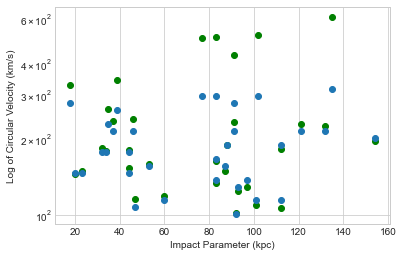

In [171]:
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Log of Circular Velocity (km/s)')
plt.yscale('log')
NFW_vals = plt.scatter(R, velocity_vals, color = 'g')
#lower_vals = plt.scatter(R, lower_tully_fisher_vc, color = 'r')
#higher_vals = plt.scatter(R, higher_tully_fisher_vc)
#average_tully_fisher_vals = plt.scatter(R, average_tully_fisher_vc)
plt.scatter(R, a)
#plt.scatter(R, average_circular_velocity, color = 'r')
#plt.legend([NFW_vals, lower_vals, higher_vals], ['NFW Profile Velocities', ' Lower Tully-Fisher Velocities', 
                                               # 'Higher Tully-Fisher Velocities'])
#plt.legend([NFW_vals, average_tully_fisher_vals], ['NFW Profile Velocities', 'Average Tully-Fisher Velocities'])

In [172]:
average_circular_velocity = []
#log_of_NFW_velocity = np.log(velocity_vals)

for item in range(0,33): 
    average_circular_velocity.append((velocity_vals[item] + a[item])/2)

# Diffusivity

Functions:

In [174]:
def diffusivity_coefficient(N_H, circular_velocity, halo_mass, M_star_i, star_formation_rate):
    nums = 1e18 * 1e30
    v_circ_norm = 200 * np.power(circular_velocity, -1)
    N_H_fr = np.power(10, N_H)
    #return_value = nums * np.power(N_H_fr, -1) * (M_star_i) / np.power(v_circ_norm, 2)
    return nums * np.power(N_H_fr, -1) * (np.power(star_formation_rate, -1)) * np.power(v_circ_norm, 2)

In [15]:
def error_dy_value(N_H_low,N_H_high):
    for x in range(0,33):
        N_H_amt_low = diffusivity_coefficient(N_H_low[x], velocity_vals, predictedM, M_star_d, sfr)
        N_H_amt_high = diffusivity_coefficient(N_H_high[x], velocity_vals, predictedM, M_star_d, sfr)
        return ((N_H_amt_high-N_H_amt_low))

In [22]:
def sfr_atm(age, stellar_mass): 
    return stellar_mass/age

In [178]:
R_vir = data['R/R_vir']
R = data['R']
N_H = data['N_H']
M_star_d = data['log M_*']
galaxy_age = data['Age Gyr']
sfr_calc = sfr_atm(galaxy_age,M_star_d)
velocity_vals = np.array([134.05430348763306, 510.21258348149706, 183.43068548075482, 618.451524921208, 110.04104426428928, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 197.2776795711477, 227.49075690415384, 185.00543166922802, 146.1938044781218, 124.30436763865931, 107.24392367586164, 236.78327050423655, 150.3368062665032, 265.06291167573903, 189.91927258930735, 163.88186723392656, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 129.57960283661137, 241.937639758548])
N_H_low = data['log N_H low']
N_H_high = data['log N_H high']
sfr_instant = data['SFR']
#average of instantaneous & calculated sfr: 
sfr = []
for item in range (0,33): 
    sfr.append((sfr_instant[item]+sfr_calc[item])/2)

SFR Stuff:

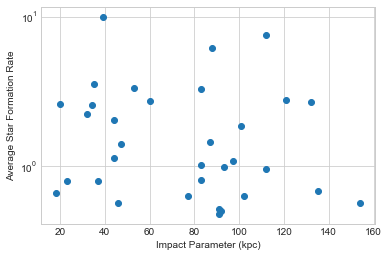

In [75]:
less_sfr = []
indeces_less_sfr = []
less_sfr_Rs = []

for item in sfr: 
    if (item > 0.01) and (item < 0.1) or (item==0.01):
        less_sfr.append(item)
        less_sfr_Rs.append(R[sfr.indexof(item)])

plt.yscale('log')
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Average Star Formation Rate')        
plt.scatter(R, sfr)

# Diffusivity Values:

Diffusivity Values with Average Velocity between Tully-Fisher & NFW:

In [124]:
def error_dy_value_vc(tullyfishervc, NFWvc):
    for item in range(0,33):
        vcirclow = diffusivity_coefficient(N_H, tullyfishervc[item], predictedM, M_star_d, sfr)
        vcirchigh = diffusivity_coefficient(N_H, NFWvc[item], predictedM, M_star_d, sfr)
        return ((vcirchigh-vcirclow))

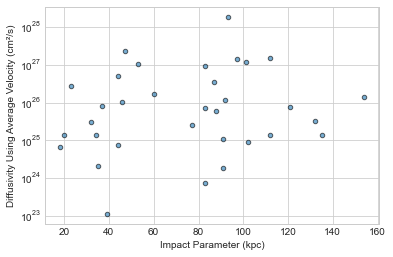

In [117]:
y = diffusivity_coefficient(N_H, np.array(np.power(10,average_circular_velocity)), predictedM, M_star_d, sfr)
plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
plt.yscale('log')
#plt.ylim(1e26,1e32)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Diffusivity Using Average Velocity (cm²/s)')
plt.show()

    Velocity Values Error Bars:

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

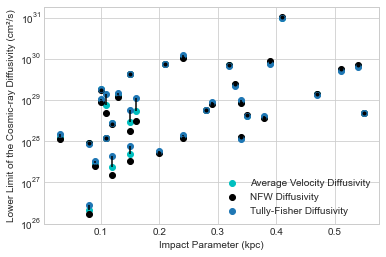

In [181]:
y_vc = diffusivity_coefficient(N_H, average_circular_velocity, predictedM, M_star_d, sfr)
y_high_vc = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_low_vc = diffusivity_coefficient(N_H, average_tully_fisher_vc, predictedM, M_star_d, sfr)

avg_vc_plot = plt.scatter(R_vir, y_vc, color = 'c')
NFW_vc_plot = plt.scatter(R_vir, y_high_vc, color = 'k')
tullyfisher_vc_plot = plt.scatter(R_vir, y_low_vc)

plt.yscale('log')
plt.errorbar(R_vir, y_high_vc, yerr=[y_high_vc-y_vc, y_low_vc-y_high_vc], fmt='.k')

plt.legend([avg_vc_plot, NFW_vc_plot, tullyfisher_vc_plot] , ['Average Velocity Diffusivity', 'NFW Diffusivity', 'Tully-Fisher Diffusivity'])

#plt.ylim(1e22, 1e32)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

In [ ]:
y_vc = diffusivity_coefficient(N_H, np.power(10,average_circular_velocity), predictedM, M_star_d, sfr)
y_high_vc = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_low_vc = diffusivity_coefficient(N_H, np.power(10, average_tully_fisher_vc), predictedM, M_star_d, sfr)

avg_vc_plot = plt.scatter(R, y_vc, color = 'c', alpha = 0.3)
NFW_vc_plot = plt.scatter(R, y_high_vc, color = 'k')
tullyfisher_vc_plot = plt.scatter(R, y_low_vc, alpha = 0.3)

plt.yscale('log')
plt.errorbar(R, y_high_vc, yerr=[y_high_vc-y_vc, y_low_vc-y_high_vc], fmt='.k')

plt.legend([avg_vc_plot, NFW_vc_plot, tullyfisher_vc_plot] , ['Average Velocity Diffusivity', 'NFW Diffusivity', 'Tully-Fisher Diffusivity'])

plt.ylim(1e22, 1e32)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

    N_H Error Bars Using Average Circular Velocity Diffusivity:

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

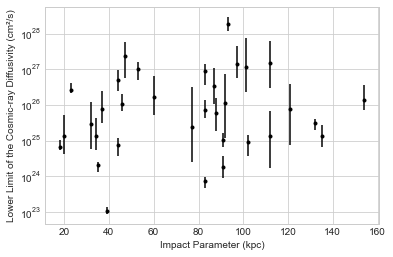

In [157]:
y = diffusivity_coefficient(N_H, np.power(10,average_circular_velocity), predictedM, M_star_d, sfr)
y_high = diffusivity_coefficient(N_H_low, np.power(10,average_circular_velocity), predictedM, M_star_d, sfr)
y_low = diffusivity_coefficient(N_H_high, np.power(10,average_circular_velocity), predictedM, M_star_d, sfr)

dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
#plt.ylim(1e26,1e32)
plt.errorbar(R, y, yerr =[y-y_low,y_high-y], fmt='.k');
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

Calculated and Average SFR Diffusivity Values:

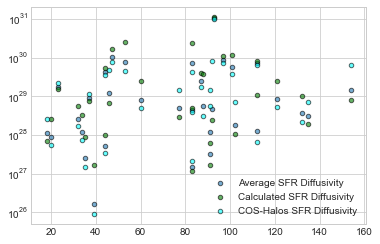

In [166]:
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_3 = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr_calc)
y_4 = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr_inst)

avgsfr = plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
calcsfr = plt.scatter(R, y_3, s=20, color = 'green', alpha = 0.6, edgecolor='black', linewidth=1)
datasfr = plt.scatter(R, y_4, s=20, color = 'cyan', alpha = 0.6, edgecolor='black', linewidth=1)

plt.legend([avgsfr, calcsfr, datasfr], ['Average SFR Diffusivity', 'Calculated SFR Diffusivity', 'COS-Halos SFR Diffusivity'])

plt.yscale('log')

Diffusivity Values with NFW Velocities:

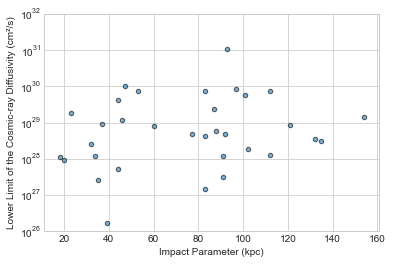

In [113]:
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
plt.scatter(R, y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
diff_coeffs = list(y)
#print(diff_coeffs)
plt.yscale('log')
plt.ylim(1e26,1e32)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')
plt.show()

# Diffusivity Values w/ Error Bars

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

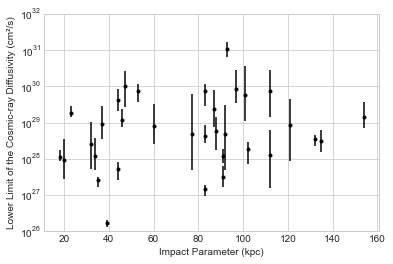

In [50]:
galaxy_age = data['Age Gyr']
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_high = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr)
y_low = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr)

dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
plt.ylim(1e26,1e32)
plt.errorbar(R, y, yerr =[y-y_low,y_high-y], fmt='.k');
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

Text(0, 0.5, 'Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

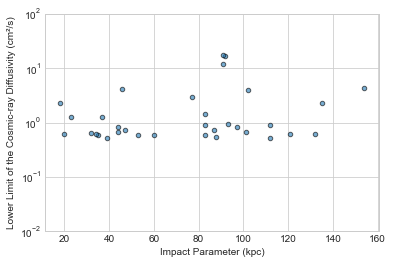

In [51]:
#Correct SFR:
sfr_sfr = sfr_atm(galaxy_age,M_star_d)
y = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr)
y_high_sfr = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr)
y_low_sfr = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr)

#Inst. SFR: 
sfr_inst = data['SFR']
y_t = diffusivity_coefficient(N_H, velocity_vals, predictedM, M_star_d, sfr_inst)
y_high_t = diffusivity_coefficient(N_H_low, velocity_vals, predictedM, M_star_d, sfr_inst)
y_low_t = diffusivity_coefficient(N_H_high, velocity_vals, predictedM, M_star_d, sfr_inst)

#Plot:
dy = error_dy_value(N_H_low,N_H_high)
plt.yscale('log')
plt.ylim(1e-2,1e2)
#plt.errorbar(R, y_t/y, yerr =[(y_t-y_low_t)/(y-y_low),(y_high_t-y_t)/(y_high-y)], fmt='.k');
plt.scatter(R, y_t/y, s=20, alpha=0.6, edgecolor='black', linewidth=1)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

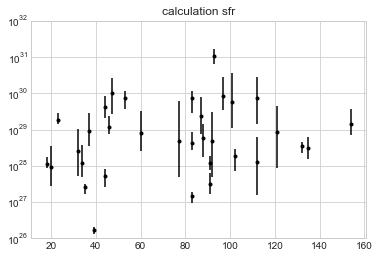

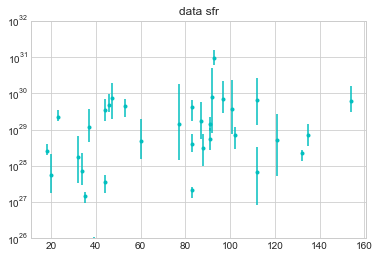

In [52]:
plt.errorbar(R, y, yerr =[(y-y_low_sfr),(y_high_sfr-y)], fmt='.k');
plt.yscale('log')
plt.ylim(1e26,1e32)
plt.title("calculation sfr")
plt.show()

dy = error_dy_value(N_H_low,N_H_high)
plt.title("data sfr")
plt.yscale('log')
plt.ylim(1e26,1e32)
plt.errorbar(R, y_t, yerr =[y_t-y_low_t,y_high_t-y_t], fmt='.c');

#plt.xlabel('Impact Parameter (kpc)')
#plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')

List of Coeffs:

In [54]:
diff_coeffs = []
for i in range(0,33): 
    diff_coeffs.append(diffusivity_coefficient(N_H[i], velocity_vals[i], predictedM[i], M_star_d[i], sfr[i]))

In [53]:
#print(np.array(predictedM)/1e11)

In [199]:
for item in range(0,33): 
    #print(item, N_H[item], a[item], predictedM[item], M_star_d[item], sfr[item])
    #print(item, N_H_low[item], N_H[item], N_H_high[item])
    print(item, velocity_vals[item], a[item])
    #print(item, predictedM[item])
    print(item, sfr_calc[item], sfr_inst[item])

0 134.05430348763306 138.67558288718882
0 0.9132007233273055 1.14
1 510.21258348149706 298.9509927814587
1 1.0506741050674104 0.21
2 183.43068548075482 190.9853258566237
2 0.8880697050938338 14.12
3 618.451524921208 318.7131627022801
3 1.0698198198198199 0.3
4 110.04104426428928 114.44583707587128
4 0.9028097650852143 2.83
5 513.2321384813996 298.9509927814587
5 1.0506741050674104 0.57
6 234.47085431245546 217.0700968397712
6 0.9136282886388631 0.04
7 230.4213140053146 217.0700968397712
7 0.9856712603814913 4.52
8 102.33555196284 100.69316688518045
8 0.9774971998778128 0.03
9 435.22941800909996 280.41419854536935
9 1.0032246506628448 0.03
10 119.21853483839298 114.44583707587128
10 0.8944054029387606 4.58
11 154.43032711839197 147.84273904006696
11 1.0478734333264845 3.04
12 149.4959744149872 147.84273904006696
12 0.9483960948396093 0.64
13 181.09407352030155 179.14306484060262
13 0.9054846498792687 1.37
14 159.3110992310241 157.61589049638374
14 0.9576940957694096 5.68
15 330.35236556

In [202]:
greatest_velocity_values = []
greatest_sfr_values = []

for item in range(0,33): 
    greatest_velocity_values.append(max(velocity_vals[item], a[item]))
    greatest_sfr_values.append(max(sfr_calc[item], sfr_inst[item]))
    
lowest_velocity_values = []
lowest_sfr_values = []
for item in range(0,33): 
    lowest_velocity_values.append(min(velocity_vals[item], a[item]))
    lowest_sfr_values.append(min(sfr_calc[item], sfr_inst[item]))

In [201]:
print(greatest_velocity_values)
print(greatest_sfr_values)

[138.67558288718882, 510.21258348149706, 190.9853258566237, 618.451524921208, 114.44583707587128, 513.2321384813996, 234.47085431245546, 230.4213140053146, 102.33555196284, 435.22941800909996, 119.21853483839298, 154.43032711839197, 149.4959744149872, 181.09407352030155, 159.3110992310241, 330.3523655693238, 203.61042011319685, 227.49075690415384, 185.00543166922802, 147.84273904006696, 130.0768466139537, 114.44583707587128, 236.78327050423655, 157.61589049638374, 265.06291167573903, 190.9853258566237, 168.0350966051527, 346.2770941360653, 116.13182974316351, 524.9985013624732, 180.67373358423535, 138.67558288718882, 241.937639758548]
[1.14, 1.0506741050674104, 14.12, 1.0698198198198199, 2.83, 1.0506741050674104, 0.9136282886388631, 4.52, 0.9774971998778128, 1.0032246506628448, 4.58, 3.04, 0.9483960948396093, 1.37, 5.68, 1.0317825886688161, 1.0134495169539686, 4.38, 3.42, 4.32, 1.06, 1.05, 0.9673951988534576, 1.99, 6.04, 11.36, 5.56, 18.96, 1.96, 1.1100196463654226, 4.18, 1.33, 1.00418

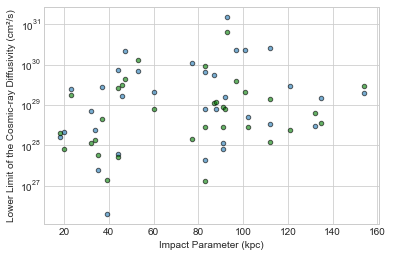

In [212]:
y_max_diff = diffusivity_coefficient(N_H_low, lowest_velocity_values, predictedM, M_star_d, greatest_sfr_values)
y_min_diff = diffusivity_coefficient(N_H_high, greatest_velocity_values, predictedM, M_star_d, lowest_sfr_values)
plt.scatter(R, y_max_diff, s=20, alpha=0.6, edgecolor='black', linewidth=1)
plt.scatter(R, y_min_diff, s=20, alpha=0.6, edgecolor='black', linewidth=1, color= 'green')
#diff_coeffs = list(y)
#print(diff_coeffs)
plt.yscale('log')
#plt.ylim(1e26,1e32)
plt.xlabel('Impact Parameter (kpc)')
plt.ylabel('Lower Limit of the Cosmic-ray Diffusivity (cm²/s)')
plt.show()

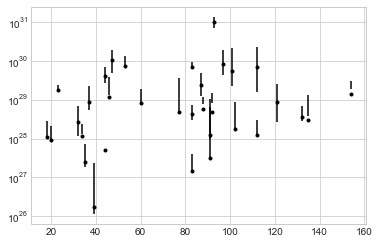

In [208]:
plt.errorbar(R, y, yerr=[(y-y_min_diff), (y_max_diff-y)], fmt='.k');
plt.yscale('log')
plt.show()